# Reinforcement Learning Project


> AI51201 & IE51401 at UNIST (Fall 2021)

## Import modules

In [1]:
import time
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from gym import spaces

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from env import *
from utils import *
from algorithms import *

## Environment

### 1. Small Grid World

- World shape = 5 x 5
- Pac-man start position = [4, 0]
- Ghost position = [[1, 1], [0, 4]]
- Star position = [0, 3]
- Action space = up(0), down(1), left(2), right(3)
- Observation space = 5 x 5 grid world
- Agent render = agent(-1)

- Wall = [[3, 0], [3, 1], [3, 3], [1, 2], [2, 3]]

### 2. Big Grid World

- World shape = 11 x 11
- Pac-man start position = [10, 5]
- Ghost start position = [[1, 5], [6, 5]]
- Star position = [[0, 0], [0, 10]]
- Action space = up(0), down(1), left(2), right(3) 
- Observation space = 11 x 11 grid world
- Agent render = agent(-1)

- Wall = [[0, 5], [1, 1], [1, 2], [1, 3], [1, 7], [1, 8], [1, 9], [2, 5], [3, 1], [3, 3], [3, 5], [3, 7], [3, 9], [4, 1], [4, 3], [4, 7], [4, 9], [5, 1], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 9], [6, 1], [6, 9], [7, 3], [7, 4], [7, 6], [7, 7], [8, 1], [8, 4], [8, 6], [8, 9], [9, 1], [9, 2], [9, 4], [9, 6], [9, 8], [9, 9]]
- Ghost's load = [[1, 4], [1, 5], [1, 6], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8]]

Test environment.

In [3]:
episode = 5
step = 50

In [4]:
env = BigGridEnv()

for i_episode in range(episode):
    env.reset()
    print("Reset env.")
    env.render()

    for t in range(step):
        action = env.action_space.sample()
        print("action: {}".format(action))
        obs, reward, done, info = env.step(action)
        print("obs: {}, reward:{}, done:{}".format(obs, reward, done))
        env.render()

        env.step_ghost()

        if done:
            print("Episode finished after {} timesteps\n".format(t + 1))
            break

env.close()

Reset env.
* $ $ $ $ # $ $ $ $ * 
$ # # # 0 G 0 # # # $ 
$ $ $ $ $ # $ $ $ $ $ 
$ # $ # $ # $ # $ # $ 
$ # $ # $ $ $ # $ # $ 
$ # $ # # # # # $ # $ 
$ # 0 0 0 G 0 0 0 # $ 
$ $ $ # # $ # # $ $ $ 
$ # $ $ # $ # $ $ # $ 
$ # # $ # $ # $ # # $ 
$ $ $ $ $ C $ $ $ $ $ 

action: 0
obs: [9, 5], reward:1, done:False
* $ $ $ $ # $ $ $ $ * 
$ # # # 0 G 0 # # # $ 
$ $ $ $ $ # $ $ $ $ $ 
$ # $ # $ # $ # $ # $ 
$ # $ # $ $ $ # $ # $ 
$ # $ # # # # # $ # $ 
$ # 0 0 0 G 0 0 0 # $ 
$ $ $ # # $ # # $ $ $ 
$ # $ $ # $ # $ $ # $ 
$ # # $ # C # $ # # $ 
$ $ $ $ $ 0 $ $ $ $ $ 

action: 2
obs: [9, 5], reward:-1, done:False
* $ $ $ $ # $ $ $ $ * 
$ # # # G 0 0 # # # $ 
$ $ $ $ $ # $ $ $ $ $ 
$ # $ # $ # $ # $ # $ 
$ # $ # $ $ $ # $ # $ 
$ # $ # # # # # $ # $ 
$ # 0 0 G 0 0 0 0 # $ 
$ $ $ # # $ # # $ $ $ 
$ # $ $ # $ # $ $ # $ 
$ # # $ # C # $ # # $ 
$ $ $ $ $ 0 $ $ $ $ $ 

action: 1
obs: [10, 5], reward:-1, done:False
* $ $ $ $ # $ $ $ $ * 
$ # # # 0 G 0 # # # $ 
$ $ $ $ $ # $ $ $ $ $ 
$ # $ # $ # $ # $ # $ 


In [5]:
env = SmallGridEnv()

for i_episode in range(episode):
    env.reset()
    print("Reset env.")
    env.render()

    for t in range(step):
        action = env.action_space.sample()
        print("action: {}".format(action))
        obs, reward, done, info = env.step(action)
        print("obs: {}, reward:{}, done:{}".format(obs, reward, done))
        env.render()

        if done:
            print("Episode finished after {} timesteps\n".format(t + 1))
            break

env.close()

Reset env.
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 1
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 0
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 2
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 2
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 1
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 0
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 3
obs: [4, 1], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
0 C 0 0 0 

action: 2
obs: [4, 0], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
C 0 0 0 0 

action: 3
obs: [4, 1], reward:-1, done:False
0 0 * 0 G 
0 G # 0 0 
0 0 0 # 0 
# # 0 # 0 
0 C 0 0 0 

action: 1
obs: [4, 1], r

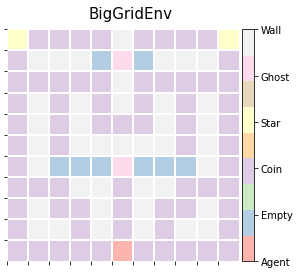

In [6]:
env = BigGridEnv()
env.reset()
visualize_matrix(env.world, world='Big', strs='', cmap='Pastel1',title='BigGridEnv')

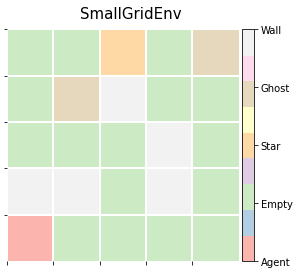

In [7]:
env = SmallGridEnv()
env.reset()
visualize_matrix(env.world, world='Small', strs='', cmap='Pastel1',title='SmallGridEnv')